3.6 Lab: Linear Regression

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston = pd.read_csv('../data/Boston.csv')
boston.info()
boston.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
X = boston.lstat.array.reshape(-1, 1)
X

<PandasArray>
[
[4.98],
[9.14],
[4.03],
[2.94],
[5.33],
[5.21],
[12.43],
[19.15],
[29.93],
[17.1],
[20.45],
[13.27],
[15.71],
[8.26],
[10.26],
[8.47],
[6.58],
[14.67],
[11.69],
[11.28],
[21.02],
[13.83],
[18.72],
[19.88],
[16.3],
[16.51],
[14.81],
[17.28],
[12.8],
[11.98],
[22.6],
[13.04],
[27.71],
[18.35],
[20.34],
[9.68],
[11.41],
[8.77],
[10.13],
[4.32],
[1.98],
[4.84],
[5.81],
[7.44],
[9.55],
[10.21],
[14.15],
[18.8],
[30.81],
[16.2],
[13.45],
[9.43],
[5.28],
[8.43],
[14.8],
[4.81],
[5.77],
[3.95],
[6.86],
[9.22],
[13.15],
[14.44],
[6.73],
[9.5],
[8.05],
[4.67],
[10.24],
[8.1],
[13.09],
[8.79],
[6.72],
[9.88],
[5.52],
[7.54],
[6.78],
[8.94],
[11.97],
[10.27],
[12.34],
[9.1],
[5.29],
[7.22],
[6.72],
[7.51],
[9.62],
[6.53],
[12.86],
[8.44],
[5.5],
[5.7],
[8.81],
[8.2],
[8.16],
[6.21],
[10.59],
[6.65],
[11.34],
[4.21],
[3.57],
[6.19],
[9.42],
[7.67],
[10.63],
[13.44],
[12.33],
[16.47],
[18.66],
[14.09],
[12.27],
[15.55],
[13.0],
[10.16],
[16.21],
[17.09],
[10.45],
[15.76],
[12.04],
[1

In [6]:
y = boston.medv
singleRegression = LinearRegression().fit(X, y)

In [16]:
print(singleRegression.intercept_)
print(singleRegression.coef_)
y

34.55384087938311
[-0.95004935]


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
statmodel = smf.ols('medv ~ lstat', boston).fit()

In [10]:
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           5.08e-88
Time:                        12:27:23   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
predictor_array = np.array([5, 10, 15]).reshape(-1, 1)
prediction = singleRegression.predict(predictor_array)
prediction

array([29.80359411, 25.05334734, 20.30310057])

<AxesSubplot:xlabel='lstat', ylabel='medv'>

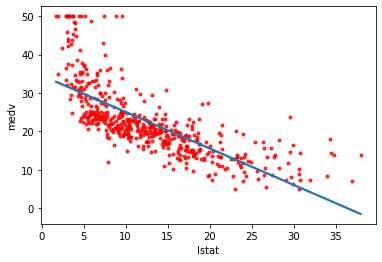

In [22]:
sns.regplot(x=boston.lstat, y=boston.medv, order=1, ci=None, scatter_kws={'color':'r', 's':9})

In [26]:
statmodel_2_predictors = smf.ols('medv ~ lstat + age', boston).fit()
statmodel_2_predictors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.98e-88
Time:                        13:43:40   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
all_predictors = "+".join(X.columns)
all_predictors_formula = 'medv ~ ' + all_predictors
statmodel_all_predictors = smf.ols(all_predictors_formula, boston).fit()
statmodel_all_predictors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          2.23e-133
Time:                        13:47:08   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X = boston.drop(['medv', 'black'], axis=1)
y = boston.medv
all_predictor_regression = LinearRegression().fit(X, y)
print(all_predictor_regression.intercept_)
print(all_predictor_regression.coef_)

41.617270175954616
[-1.21388618e-01  4.69634633e-02  1.34676947e-02  2.83999338e+00
 -1.87580220e+01  3.65811904e+00  3.61071055e-03 -1.49075365e+00
  2.89404521e-01 -1.26819813e-02 -9.37532900e-01 -5.52019101e-01]
